# 🧠 Project Overview
### This project predicts whether a student will get placed (1) or not (0) based on two factors:
## CGPA (Cumulative Grade Point Average)
## IQ (Intelligence Quotient)
### We use Logistic Regression, a popular classification algorithm, to model the relationship between these features and placement status.

## 🪜 Steps Overview

### 1. Preprocessing + Exploratory Data Analysis (EDA)

### 2. Feature Selection

### 3. Train-Test Split

### 4. Feature Scaling

### 5. Model Training

### 6. Model Evaluation / Model Selection

### 7. Model Deployment

In [ ]:
# Import Libraries and Load Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

### Step 1: Basic Cleaning 

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

### Step 2: Data Visualization (EDA)

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('CGPA vs IQ (Colored by Placement)')
plt.show()

### Step 3: Feature Selection
#### We separated:
#### Input (X): CGPA and IQ
#### Output (y): Placement (1 or 0)
#### This is a supervised learning setup because we know the correct outputs.

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

In [ ]:
y

In [ ]:
y.shape

In [ ]:
X.shape

### Step 4: Train-Test Split

#### We split the data into:
#### Training set (90%) → used to train the model
#### Testing set (10%) → used to check how well the model generalizes
#### random_state=42 ensures reproducibility (same split every time).
#### Prevents overfitting by testing on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

### Step 5: Feature Scaling

#### Why: CGPA and IQ have different ranges.
#### StandardScaler: standardizes features → mean = 0, standard deviation = 1
#### This helps Logistic Regression converge faster and gives equal importance to both features.
#### Formula:
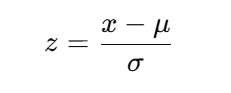

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler() 

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

### Step 6: Model Training (Logistic Regression)

#### Logistic Regression is used because the target variable (placement) is binary (0 or 1).
#### It models the probability that a student will be placed based on CGPA and IQ.
#### Mathematical idea:
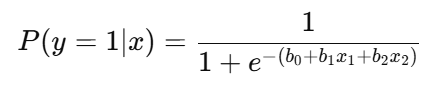
#### If 𝑃 > 0.5 → student is placed; otherwise not.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
# model training
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test

### Step 7: Model Prediction and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test,y_pred)


### Step 8: Visualizing the Decision Boundary

#### This plot shows how the model separates the two classes (placed vs not placed).

In [ ]:
from mlxtend.plotting import plot_decision_regions


In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


### Step 9: Model Deployment (Saving the Model)

#### Pickle serializes the model and saves it to disk.
#### You can later load it and use it in a Flask or Streamlit web app:

In [ ]:
import pickle


In [ ]:
pickle.dump(clf,open('model.pkl','wb'))
